# Chapter 1  解析iTunes播放列表 

+ 首先在apple music里导出xml文件   $\surd$
+ 包： plist matplotlib numpy $\surd$

In [1]:
import re, argparse
import sys
import plistlib
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# plist = plistlib.('./library.xml')
with open('./library.xml', 'rb') as f:
    pl = plistlib.load(f)

In [6]:
pl

{'Major Version': 1,
 'Minor Version': 1,
 'Date': datetime.datetime(2023, 11, 21, 10, 27, 22),
 'Application Version': '1.3.3.2',
 'Features': 5,
 'Show Content Ratings': True,
 'Music Folder': 'file:///Users/joriri/Music/Music/Media.localized/',
 'Library Persistent ID': 'AA9A864A621E07A1',
 'Tracks': {'3376': {'Track ID': 3376,
   'Name': 'Dangerous (feat. Akon)',
   'Artist': 'Kardinal Offishall',
   'Album Artist': 'Kardinal Offishall',
   'Composer': 'Jason Harrow, C. Bahamonde & D. Sales',
   'Album': 'Dangerous (feat. Akon) - Single',
   'Genre': 'Hip-Hop/Rap',
   'Kind': 'Apple Music AAC音频文件',
   'Size': 8802453,
   'Total Time': 251840,
   'Disc Number': 1,
   'Disc Count': 1,
   'Track Number': 1,
   'Track Count': 1,
   'Year': 2008,
   'Date Modified': datetime.datetime(2018, 7, 19, 14, 13, 47),
   'Date Added': datetime.datetime(2018, 7, 19, 14, 13, 47),
   'Bit Rate': 256,
   'Sample Rate': 44100,
   'Play Count': 15,
   'Play Date': 3771341607,
   'Play Date UTC': datet

In [7]:
tracks = pl['Tracks']

In [8]:
tracks

{'3376': {'Track ID': 3376,
  'Name': 'Dangerous (feat. Akon)',
  'Artist': 'Kardinal Offishall',
  'Album Artist': 'Kardinal Offishall',
  'Composer': 'Jason Harrow, C. Bahamonde & D. Sales',
  'Album': 'Dangerous (feat. Akon) - Single',
  'Genre': 'Hip-Hop/Rap',
  'Kind': 'Apple Music AAC音频文件',
  'Size': 8802453,
  'Total Time': 251840,
  'Disc Number': 1,
  'Disc Count': 1,
  'Track Number': 1,
  'Track Count': 1,
  'Year': 2008,
  'Date Modified': datetime.datetime(2018, 7, 19, 14, 13, 47),
  'Date Added': datetime.datetime(2018, 7, 19, 14, 13, 47),
  'Bit Rate': 256,
  'Sample Rate': 44100,
  'Play Count': 15,
  'Play Date': 3771341607,
  'Play Date UTC': datetime.datetime(2023, 7, 4, 10, 53, 27),
  'Skip Count': 1,
  'Skip Date': datetime.datetime(2020, 8, 15, 9, 11, 53),
  'Release Date': datetime.datetime(2008, 1, 1, 12, 0),
  'Sort Album': 'Dangerous (feat. Akon) - Single',
  'Sort Artist': 'Kardinal Offishall',
  'Sort Name': 'Dangerous (feat. Akon)',
  'Persistent ID': 'ED68

In [10]:
trackNames = {}
for trackId, track in tracks.items():
    try:
        name = track['Name']
        duration = track['Total Time']
        if name in trackNames:
            if duration//1000 == trackNames[name][0]//1000:
                count = trackNames[name][1]
                trackNames[name] = (duration,count+1)
        else:
            trackNames[name] =(duration,1)
    except:
        pass

In [11]:
trackNames

{'Dangerous (feat. Akon)': (251840, 1),
 'Money On My Mind': (192670, 2),
 'Best Part (feat. H.E.R.)': (209831, 1),
 'Back to You (feat. Bebe Rexha & Digital Farm Animals)': (190428, 1),
 'Strip That Down (feat. Quavo)': (204502, 1),
 'Fetish (feat. Gucci Mane)': (186113, 1),
 'Pretty Girl (Cheat Codes X Cade Remix)': (193613, 1),
 'LOST MY MIND': (144359, 1),
 'Summer': (222533, 1),
 'Wake Me Up': (249688, 2),
 'Lonely Together (feat. Rita Ora)': (181731, 1),
 'Levels (Radio Edit)': (199904, 1),
 'Alone': (273803, 1),
 "I'm On Fire": (154360, 1),
 'Sail': (259093, 1),
 '7 rings': (178631, 1),
 'thank u, next': (207322, 1),
 'Bang Bang': (199377, 2),
 'Problem (feat. Iggy Azalea)': (193993, 1),
 'Love Me Harder': (236041, 1),
 'One Last Time': (197278, 1),
 'Dancing With A Stranger': (171030, 1),
 'Too Good at Goodbyes': (201000, 1),
 'Stay With Me': (172724, 1),
 "I'm Not the Only One": (239317, 1),
 "Writing's on the Wall": (278987, 1),
 'La La La (feat. Sam Smith)': (220779, 1),
 'L

In [12]:
dups =[]
for k,v in trackNames.items():
    if v[1] > 1:
        dups.append((v[1], k))

In [13]:
dups

[(2, 'Money On My Mind'),
 (2, 'Wake Me Up'),
 (2, 'Bang Bang'),
 (2, 'Electric (feat. Khalid)'),
 (2, 'GTFO'),
 (2, 'Bohemian Rhapsody'),
 (2, 'Monster'),
 (2, 'bad guy'),
 (2, 'Heathens'),
 (2, 'Timber (feat. Ke$ha)'),
 (2, 'Time of Our Lives'),
 (2, "Nothin' On You (feat. Bruno Mars)"),
 (2, 'We Found Love (feat. Calvin Harris)'),
 (2, 'Just Give Me a Reason (feat. Nate Ruess)'),
 (2, 'Ocean Drive'),
 (2, 'Friend (Lover)'),
 (2, 'To Me'),
 (2, 'Stupid Love'),
 (2, 'Poker Face'),
 (2, 'Perfect Strangers (feat. JP Cooper)'),
 (2, 'Clarity (feat. Foxes)'),
 (2, 'Gone, Gone, Gone'),
 (2, '34+35'),
 (2, 'Blinding Lights'),
 (2, '迷宫'),
 (2, 'Shut Up and Dance'),
 (2, 'Padam Padam'),
 (2, 'Heads Will Roll (A-Trak Remix)'),
 (2, 'Sexy Bitch (feat. Akon)')]

In [19]:
def findDuplicates(fileName):
    print(f'Finding duplicate tracks in {fileName}')
    # get xml file
    with open(fileName, 'rb') as f:
        pl = plistlib.load(f)
    tracks = pl['Tracks']
    # create a track name dictionary
    trackNames = {}
    for trackId, track in tracks.items():
        try:
            name = track['Name']
            duration = track['Total Time']
            if name in trackNames:
                if duration//1000 == trackNames[name][0]//1000:
                    count = trackNames[name][1]
                    trackNames[name] = (duration,count+1)
            else:
                trackNames[name] =(duration,1)
        except:
            pass
    # store duplicates as (name,count) tuples
    dups = []
    for k,v in trackNames.items():
        if v[1] > 1:
            dups.append((v[1], k))
    
    #save duplicates to a file
    if len(dups) > 0:
        print(f'Found {len(dups)} duplicates. Track names saved to dup.txt')
    else:
        print('No duplicate tracks found.')
        
    with open('dups.txt', 'w') as f:
        for val in dups:
            f.write('[%d] %s\n' % (val[0],val[1]))
    

In [20]:
findDuplicates('./library.xml')

Finding duplicate tracks in ./library.xml
Found 29 duplicates. Track names saved to dup.txt


In [37]:
trackNameSets = []
fileNames = ['./英伦声势.xml', './音乐.xml']
for filename in fileNames:
    trackNames = set()
    # read the playlist
    with open(filename,'rb') as f:
        pl = plistlib.load(f)
    tracks = pl['Tracks']
    for trackId, track in tracks.items():
        try:
            trackNames.add(track['Name'])
        except:
            pass
    trackNameSets.append(trackNames)
commonTracks = set.intersection(*trackNameSets)

In [38]:
len(trackNameSets)

2

In [39]:
for x in trackNameSets:
    print(len(x))

43
1211


In [40]:
x,y = trackNameSets


In [42]:
commonTracks

{'Easy On Me'}

In [41]:
x.intersection(y)

{'Easy On Me'}

In [49]:
def findCommonTracks(fileNames):
    trackNameSets = []
    for filename in fileNames:
        trackNames = set()
        # read the playlist
        with open(filename,'rb') as f:
            pl = plistlib.load(f)
        tracks = pl['Tracks']
        for trackId, track in tracks.items():
            try:
                trackNames.add(track['Name'])
            except:
                pass
        trackNameSets.append(trackNames)
    commonTracks = set.intersection(*trackNameSets)
    # write to file
    if len(commonTracks) > 0:
        with open('./common.txt', 'w') as f:
#             f.writelines(commonTracks)
            for val in commonTracks:
                f.write(val+'\n')
        print(f'{len(commonTracks)} common tracks found\nTrack names written to common.txt')
    else:
        print('No common tracks')
                

In [53]:
findCommonTracks(['./音乐.xml', './2010 年代另类音乐代表作品.xml'])

16 common tracks found
Track names written to common.txt


In [59]:
i = 0
for track in tracks.values():
    if i >5:
        break
    else:
        print(track['Album Artist'])
#         print(track['Album Rating'])
    i +=1

Kardinal Offishall
Sam Smith
Daniel Caesar
Louis Tomlinson
Liam Payne
Selena Gomez


In [2]:
with open('./library.xml', 'rb') as f:
    pl = plistlib.load(f)


In [5]:
tracks = pl['Tracks']
years= []
durations =[]
for trackId, track in tracks.items():
    try:
        years.append(track['Year'])
        durations.append(track['Total Time'])
    except:
        pass
if years == [] or durations == []:
    print(f'No valid album year/total time in this file')
#     return

In [11]:
years[:5]

[2008, 2014, 2017, 2017, 2017]

In [6]:
len(years)

2544

In [7]:
len(durations)

2544

In [9]:
x= np.array(durations, np.int32)
x = x/ 60000.0
y = np.array(years, np.int16)


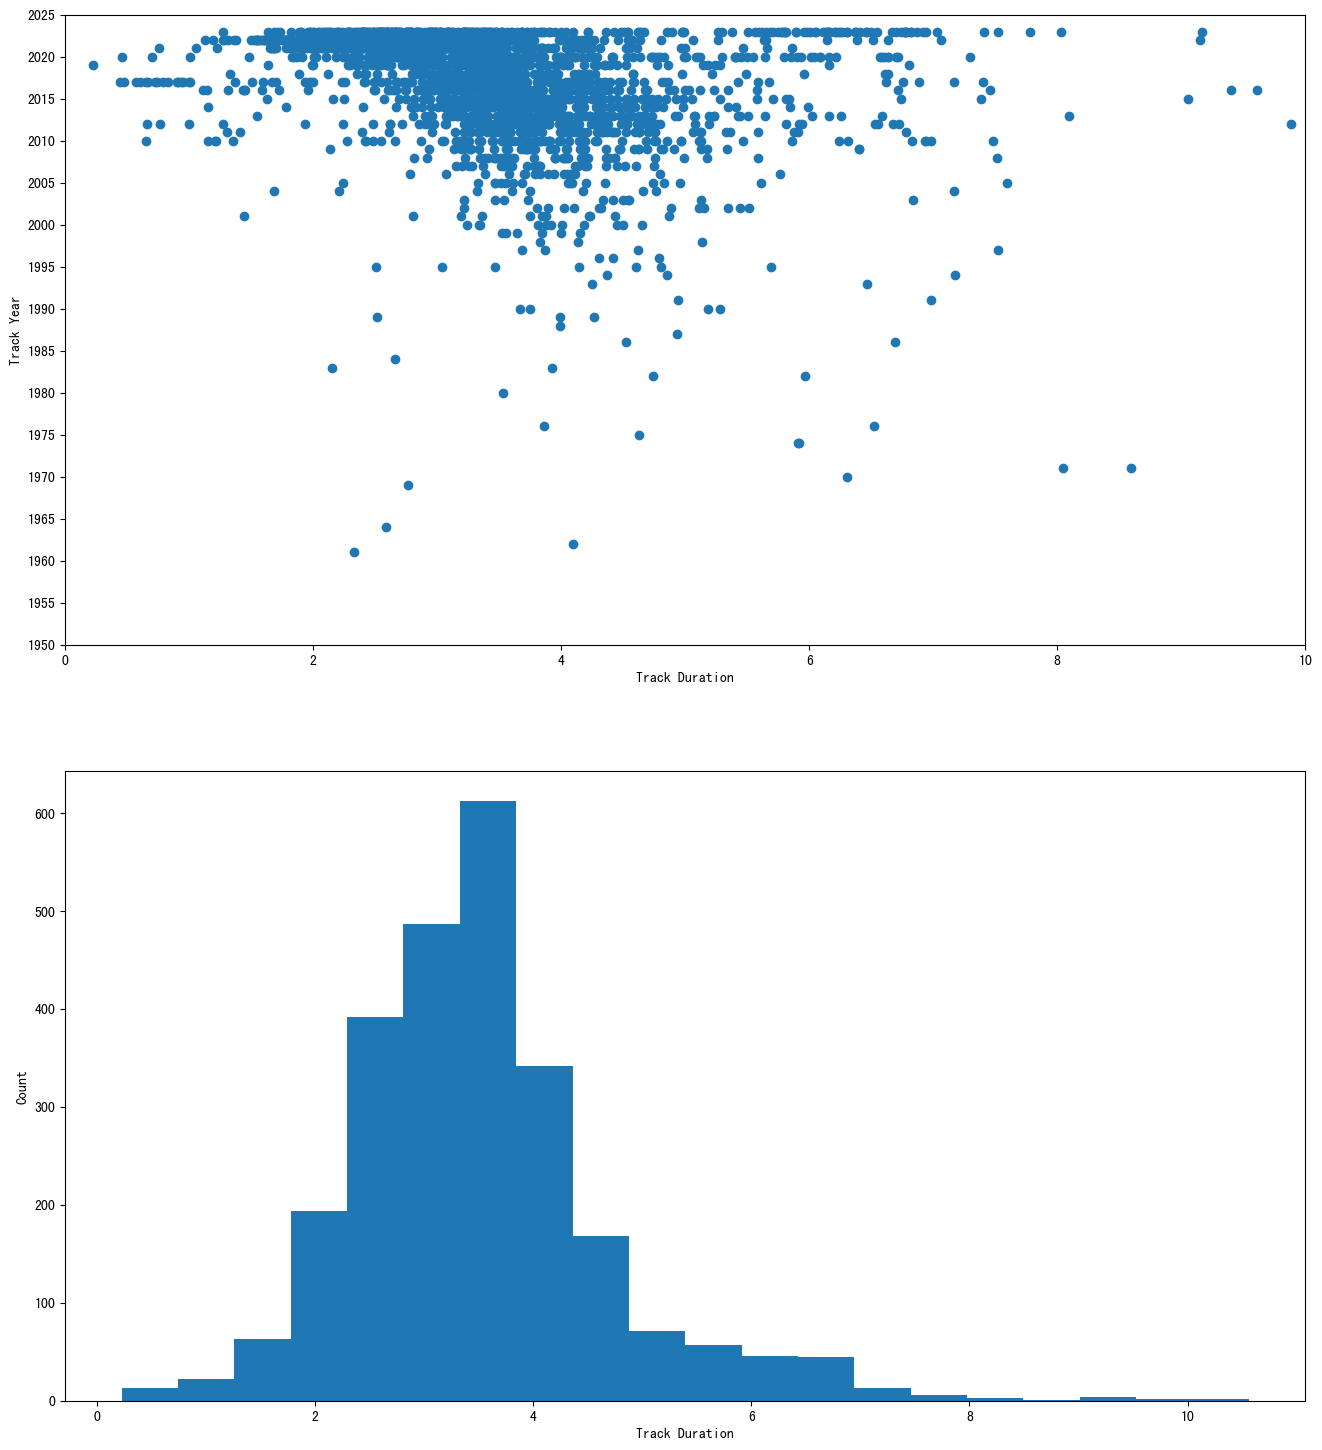

In [23]:
plt.figure(figsize=(16,18))
plt.subplot(2,1,1)
plt.plot(x,y,'o')
plt.axis([0,10,1950,np.max(y)+2])
plt.yticks(np.arange(1950,2030,5))
plt.xlabel('Track Duration')
plt.ylabel('Track Year')

# plot histgram
plt.subplot(2,1,2)
plt.hist(x, bins=20)
plt.xlabel('Track Duration')
plt.ylabel('Count')

plt.show()

In [24]:
# thers is no Album Rating 
def plotStats(filename):
    with open(filename, 'rb') as f:
        pl= plistlib.load(f)
    tracks = pl['Tracks']
    years= []
    durations =[]
    for trackId, track in tracks.items():
        try:
            years.append(track['Year'])
            durations.append(track['Total Time'])
        except:
            pass
    if years == [] or durations == []:
        print(f'No valid album year/total time in {filename}')
        return
    
    # plot data 
    x= np.array(durations, np.int32)
    x = x/ 60000.0
    y = np.array(years, np.int16)
    plt.figure(figsize=(16,18))
    plt.subplot(2,1,1)
    plt.plot(x,y,'o')
    plt.axis([0,10,1950,np.max(y)+2])
    plt.yticks(np.arange(1950,2030,5))
    plt.xlabel('Track Duration')
    plt.ylabel('Track Year')

    # plot histgram
    plt.subplot(2,1,2)
    plt.hist(x, bins=20)
    plt.xlabel('Track Duration')
    plt.ylabel('Count')

    plt.show()

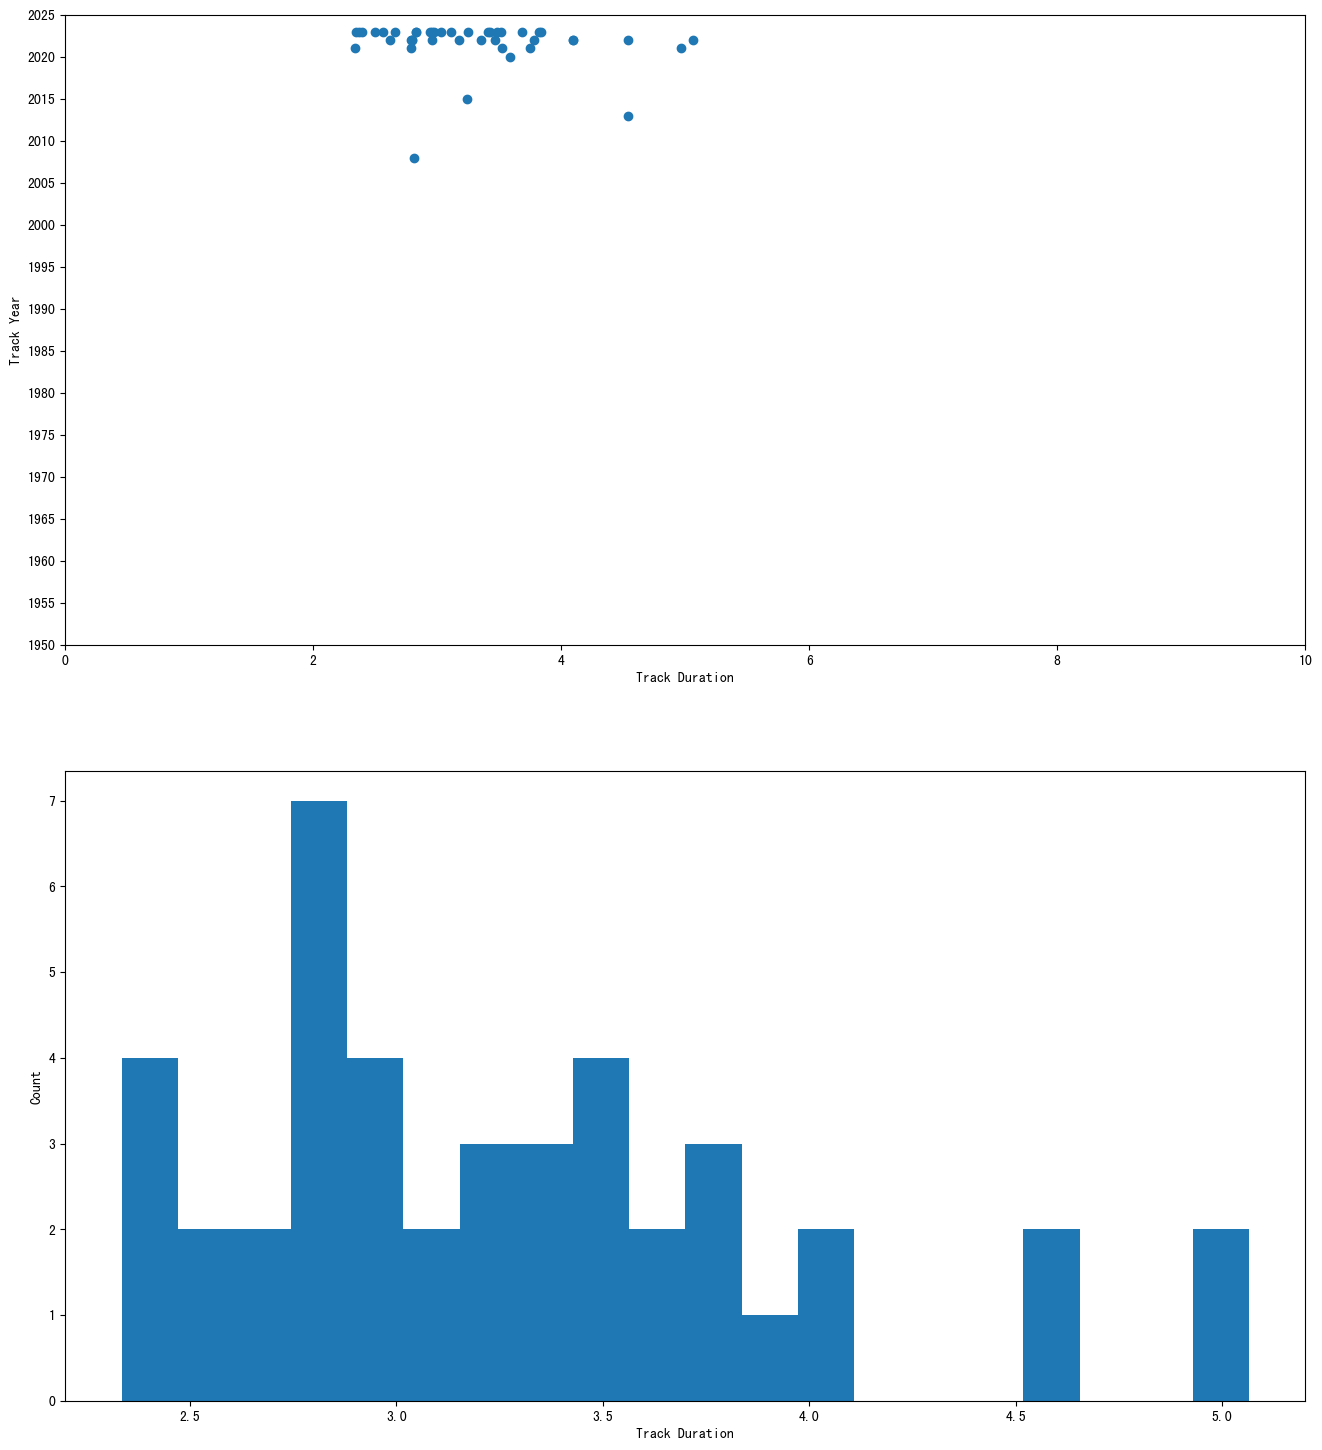

In [25]:
plotStats('./英伦声势.xml')

# Chapter 2 万花尺

**学习使用**
+ 用turtle模块创建图形
+ 使用参数方程
+ 利用数学方程生成曲线
+ 利用线段画曲线
+ 用定时器来生成图形动画
+ 将图形保存为文件

In [27]:
import math, turtle

In [35]:
def drawCircleTurtle(x,y,r):
    # moveto the start of circle
    turtle.up()
    turtle.setpos(x+r, y)
    turtle.down()
    
    # draw the circle
    for i in range(0,365,5):
        a = math.radians(i)
        turtle.setpos(x+r*math.cos(a),y+r*math.sin(a))

In [37]:
drawCircleTurtle(100,100,50)
turtle.mainloop()

In [46]:
from math import gcd

In [47]:
gcd(65,255)

5

## TODO 科赫雪花

In [1]:
import math

In [5]:
math.atan(1/2)

0.4636476090008061

In [11]:
import math

# 给定的斜率
slope = math.sqrt(3)

# 计算反正切值（弧度）
angle_radians = math.atan(slope)

# 将弧度转换为度数
angle_degrees = math.degrees(angle_radians)

print("斜率对应的角度（度）：", angle_degrees)


斜率对应的角度（度）： 59.99999999999999


In [14]:
math.degrees(math.atan2(1,1))

45.0

In [13]:
math.degrees(math.atan2(1,math.sqrt(3)))

30.000000000000004